In [ ]:
import os
from iqm.qiskit_iqm import IQMProvider
from qiskit import QuantumCircuit, QuantumRegister, transpile
from qiskit.visualization import plot_histogram
import networkx


/LUMI_TYKKY_g6173KU/miniconda/envs/env1/lib/python3.11/site-packages/iqm/iqm_client/iqm_client.py:154: UserWarning: Your IQM Client version 20.13 was built for a different version of IQM Server. You might encounter issues. For the best experience, consider using a version of IQM Client that satisfies 22.3 <= iqm-client < 23.0.
  warnings.warn(version_incompatibility_msg)


Native operations: ['measure', 'id', 'r', 'cz']
Number of qubits: 5
Coupling map: [[0, 2], [2, 0], [1, 2], [2, 1], [2, 3], [3, 2], [2, 4], [4, 2]]


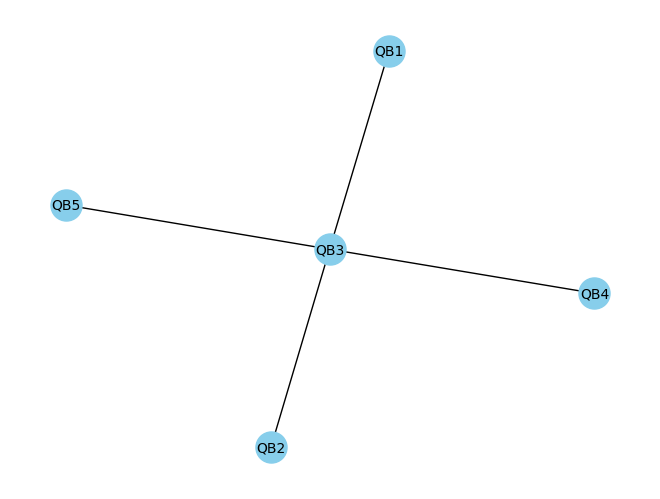

In [ ]:
# Set up the Helmi backend

HELMI_CORTEX_URL = os.getenv('HELMI_CORTEX_URL')
provider = IQMProvider(HELMI_CORTEX_URL)
backend = provider.get_backend()

print(f'Native operations: {backend.operation_names}')
print(f'Number of qubits: {backend.num_qubits}')
print(f'Coupling map: {backend.coupling_map}')

G = networkx.Graph()
G.add_edges_from(backend.coupling_map)
node_labels = {node: f"QB{node + 1}" for node in G.nodes}
networkx.draw(G, labels=node_labels, node_color='skyblue', node_size=500, font_size=10)

In [ ]:
# Lumi side ---------------------
# XY idle protocol
import qiskit
from qiskit import qpy
import pickle

resultsDict = {}
for q in range(0,5):
    fileName = "exported_circuits_q" + str(q) + ".qpy"
    with open(fileName, "rb") as handle:
        qcList = qpy.load(handle)
      
    tcList = [] # list of transpiled circuits
    for qc in qcList:
        temp = qiskit.transpile(qc, backend, layout_method='sabre', optimization_level=0, initial_layout=[0,1,2,3,4])
        tcList.append(temp)
    
    print("Submitting job on qubit" + str(q) + "...")
    job = backend.run(tcList, shots=1000)
    resultsDict[q] = []
    result = job.result()
    resultsDict[q].append(result)
    print("Job completed")

def counts_out(counts_list, file_name="exported_counts_q"):
	with open(file_name, "xb") as f:
		pickle.dump(counts_list, f, pickle.HIGHEST_PROTOCOL)

for q in range(0,5):
	countsList = resultsDict[q][0].get_counts()
	fileName = "exported_counts_q" + str(q)
	counts_out(countsList, fileName)

print("Counts exported to files")

Submitting job on qubit0...
Jobs completed
Submitting job on qubit1...
Jobs completed
Submitting job on qubit2...
Jobs completed
Submitting job on qubit3...
Jobs completed
Submitting job on qubit4...
Jobs completed
Counts exported to files


In [ ]:
# Lumi side ---------------------
# YZ idle protocol
import qiskit
from qiskit import qpy
import pickle

resultsDict = {}
for q in range(0,5):
    fileName = "exported_circuitsYZ_q" + str(q) + ".qpy"
    with open(fileName, "rb") as handle:
        qcList = qpy.load(handle)
    
    tcList = [] # list of transpiled circuits
    for qc in qcList:
        temp = qiskit.transpile(qc, backend, layout_method='sabre', optimization_level=0, initial_layout=[0,1,2,3,4])
        tcList.append(temp)
    
    print("Submitting job on qubit" + str(q) + "...")
    job = backend.run(tcList, shots=1000)
    resultsDict[q] = []
    result = job.result()
    resultsDict[q].append(result)
    print("Job completed")

def counts_out(counts_list, file_name="exported_counts_q"):
	with open(file_name, "xb") as f:
		pickle.dump(counts_list, f, pickle.HIGHEST_PROTOCOL)

for q in range(0,5):
	countsList = resultsDict[q][0].get_counts()
	fileName = "exported_countsYZ_q" + str(q)
	counts_out(countsList, fileName)

print("Counts exported to files")

Submitting job on qubit0...
Job completed
Submitting job on qubit1...
Job completed
Submitting job on qubit2...
Job completed
Submitting job on qubit3...
Job completed
Submitting job on qubit4...
Job completed
Counts exported to files
